### Packages

In [10]:
from factor_analyzer import FactorAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Prep the data

In [2]:
pop_charting = pd.read_csv('../data/songs_kword_LIWC.csv')
pop_base = pd.read_csv('../data/songs_liwc_25_04_11.csv', index_col=0)
pop_base['song'] = pop_base['song'].str.lower()

pop_non_charting = pop_base[~pop_base['song'].isin(pop_charting['title'])]
pop_non_charting.shape[0]

3043

In [3]:
austen = pd.read_csv("LIWC-22 Results - austen_chapters_text_block - LIWC Analysis.csv", index_col=0)

### Factor analysis on all three datasets

In [4]:
d = pop_charting[['Analytic', 'Linguistic',  'Cognition', 'swear', 'WC']].dropna()
scaled = StandardScaler().fit_transform(d)
scaled

array([[-0.78219397,  0.7353855 ,  0.14835975, -0.06402077,  0.3704618 ],
       [-0.82488618,  0.3838133 ,  0.20995901, -0.01841394,  0.11248635],
       [-0.56481623,  0.77674694,  0.15891963, -0.27495236, -0.23879937],
       ...,
       [-0.96745464, -0.16319168, -0.39899359,  0.63718424, -0.66144001],
       [ 1.95245723, -2.91165904, -1.40922131,  0.43765436,  0.03015376],
       [-0.33764669,  0.13978084, -0.59083126, -0.44027712, -1.07310297]],
      shape=(9290, 5))

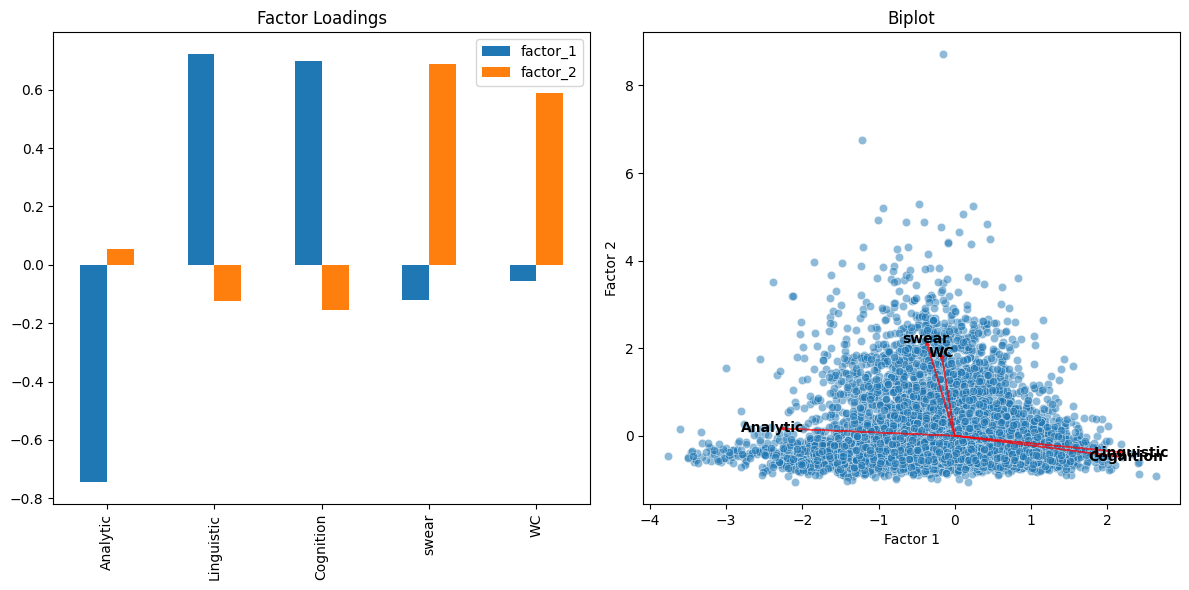

In [11]:
def output_fa_plots(df):
    df = df[['Analytic', 'Linguistic', 'Cognition', 'swear', 'WC']].dropna()
    scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
    
    fa = FactorAnalyzer(n_factors=2, rotation='varimax').fit(scaled)
    loadings = fa.loadings_
    loadings_df = pd.DataFrame(
        loadings,
        columns=[f'factor_{i+1}' for i in range(loadings.shape[1])],
        index=scaled.columns
    )
    
    scores = fa.transform(scaled)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    loadings_df.plot(kind='bar', ax=axs[0])
    axs[0].set_title("Factor Loadings")
    
    sns.scatterplot(x=scores[:,0], y=scores[:,1], ax=axs[1], alpha=0.5)
    for i, var in enumerate(df.columns):
        axs[1].arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3,
                     color='red', alpha=0.7, head_width=0.05)
        axs[1].text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, var,
                    color='black', ha='center', va='center', fontweight='bold')
    axs[1].set_xlabel("Factor 1")
    axs[1].set_ylabel("Factor 2")
    axs[1].set_title("Biplot")
    
    plt.tight_layout()
    plt.show()


output_fa_plots(pop_charting)   

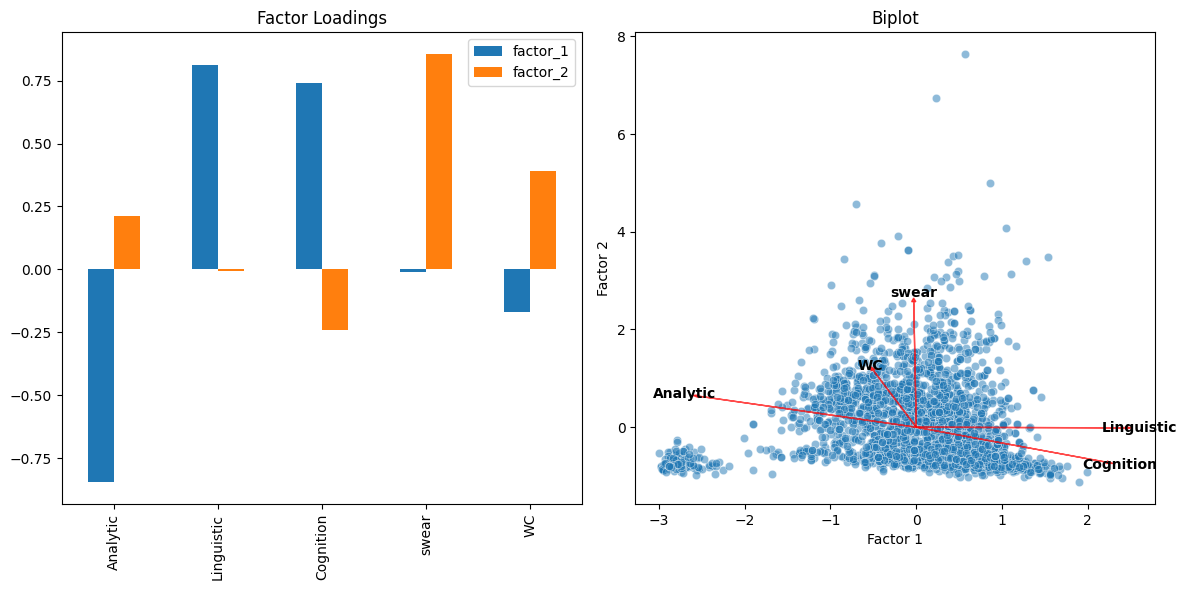

In [12]:
output_fa_plots(pop_non_charting)

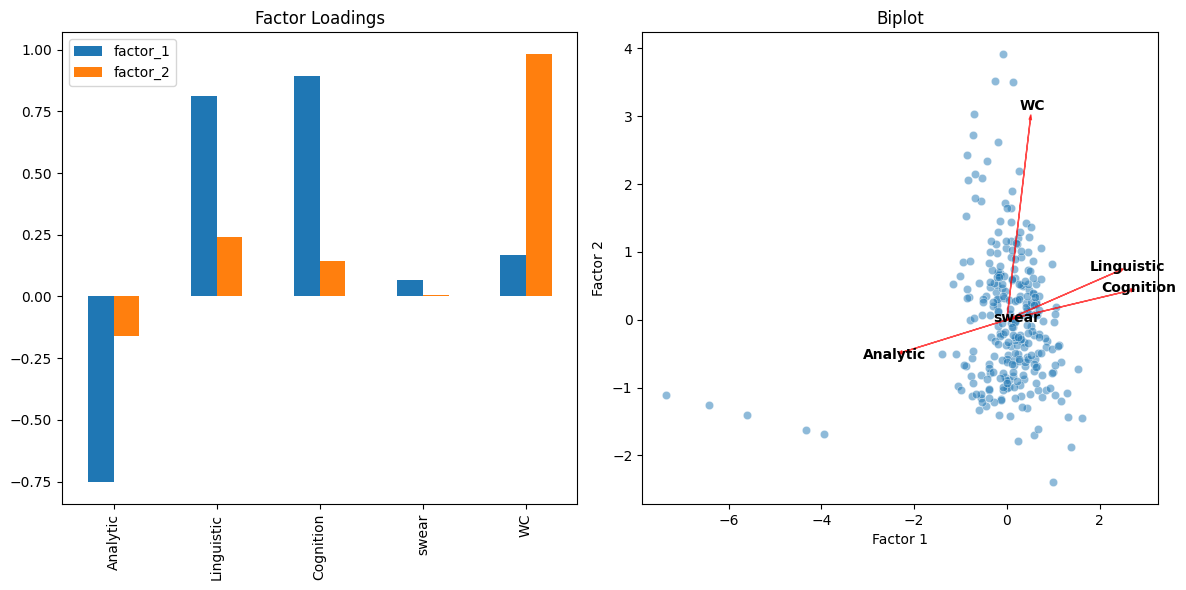

In [13]:
output_fa_plots(austen)